### Анализ поведения клиентов фитнес-центра

Проводится анализ результатов анкетирования клиентов фитнес-центров сети "Культурист-датасаентист" для формирования комплекса мер по удержанию клиентов. Необходимо выявить факторы, влияющие на вероятность оттока, а также построить модель

Для рассмотрения представлена следующая оцифрованная информация:

- **'churn'** - факт оттока в текущем месяце;
-	**'gender'** — пол;
-	**'Near_Location'** — проживание или работа в районе, где находится фитнес-центр;
-	**'Partner'** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
-	**Promo_friends** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
-	**'Phone'** — наличие контактного телефона;
-	**'Age'** — возраст;
-	**'Lifetime'** — время с момента первого обращения в фитнес-центр (в месяцах).
-	**'Contract_period'** — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
-	**'Month_to_end_contract'** — срок до окончания текущего действующего абонемента (в месяцах);
-	**'Group_visits'** — факт посещения групповых занятий;
-	**'Avg_class_frequency_total'** — средняя частота посещений в неделю за все время с начала действия абонемента;
-	**'Avg_class_frequency_current_month'** — средняя частота посещений в неделю за предыдущий месяц;
-	**'Avg_additional_charges_total'** — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.


#### Структура исследования

1. <a href ='#info1'>Общая информация </a>

- <a href ='#info2'> Вывод </a>

2. <a href ='#info3'> Исследовательский анализ </a>

- <a href ="#info4"> Вывод  </a>

3. <a href ="#info5"> Прогнозирование оттока клиентов </a>

- <a href ="#info6"> 3.1. Построение моделей </a>
- <a href ="#info7"> 3.2. Кластеризация </a>
- <a href ="#info8"> Вывод </a>

4. <a href ="#info9"> Общий вывод </a>

### 1. Общая информация <a id =info1></a>

Подгрузим необходимые для работы библиотеки

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
import plotly.express as px

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
import warnings
warnings.filterwarnings('ignore')

Рассмотрим загруженный датасет с информацией о посещениях фитнес-центров

In [8]:
display(gym.head())

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

In [9]:
print(gym.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В датафрейме **gym** содержится 4000 записей в 14 столбцах. Пропусков не обнаружено.

Для удобства переведём наименования столбцов в нижний регистр.

In [10]:
gym.columns = gym.columns.str.lower()

In [11]:
display(gym.head())

gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   churn  
0      0  
1      0  
2      0  
3      0  
4      0

Перейдём к более подробному рассмотрению показателей.

1. **gender** - пол клиента

Проверим, есть ли отклонения в значениях столбца. 

In [12]:
print(gym['gender'].value_counts())
print(gym['gender'].value_counts()/len(gym['gender']))

1    2041
0    1959
Name: gender, dtype: int64
1    0.51025
0    0.48975
Name: gender, dtype: float64


Мы видим, что в выборке примерно в одинаковом соотношении представлены клиенты мужского и женского пола. 51% клиентов фитнес-центров - мужчины, 49% - женщины.

В столбце проблемных значений не обнаружено.

2. Рассмотрим значения других столбцов с бинарными показателями - **near_location, promo_friends, partner, phone, group_visits, churn**

In [13]:
list_col = ['near_location', 'promo_friends', 'partner', 'phone', 'group_visits', 'churn']

In [14]:
# Создаём функцию для краткого анализа столба
def bin_check(col_name):
    print('Распределение значений по показателю', col_name)
    print(gym[col_name].value_counts())
    print('Доля показателей в выборке')
    print(gym[col_name].value_counts()/len(gym['gender']))
    print()

In [15]:
for element in list_col:
    bin_check(element)

Распределение значений по показателю near_location
1    3381
0     619
Name: near_location, dtype: int64
Доля показателей в выборке
1    0.84525
0    0.15475
Name: near_location, dtype: float64

Распределение значений по показателю promo_friends
0    2766
1    1234
Name: promo_friends, dtype: int64
Доля показателей в выборке
0    0.6915
1    0.3085
Name: promo_friends, dtype: float64

Распределение значений по показателю partner
0    2053
1    1947
Name: partner, dtype: int64
Доля показателей в выборке
0    0.51325
1    0.48675
Name: partner, dtype: float64

Распределение значений по показателю phone
1    3614
0     386
Name: phone, dtype: int64
Доля показателей в выборке
1    0.9035
0    0.0965
Name: phone, dtype: float64

Распределение значений по показателю group_visits
0    2351
1    1649
Name: group_visits, dtype: int64
Доля показателей в выборке
0    0.58775
1    0.41225
Name: group_visits, dtype: float64

Распределение значений по показателю churn
0    2939
1    1061
Name: churn

Мы видим, что в бинарных показателях нет пропусков и аномальных значений.

Также мы можем выявить следующие характеристики клиентской базы:

1. 84.5% клиентов проживают или работают недалеко от фитнес-центров
2. 69.1% клиентов пришли не по приглашению друзей
3. Примерно половина клиентов являются сотрудниками компаний-партнёров
4. По 90% клиентов в базе содержится информация о номере телефона
5. 58.7% клиентов посещает индивидуальные занятия
6. 26.5% клиентов из выборки прекратили обслуживание.

3. Рассмотрим оставшиеся показатели: **contract_period, age,	avg_additional_charges_total,	month_to_end_contract, lifetime, avg_class_frequency_total,	avg_class_frequency_current_month**.

Изучим их по-порядку, начиная с **contract_period** - длительность текущего действующего абонемента


1     2207
12     960
6      833
Name: contract_period, dtype: int64


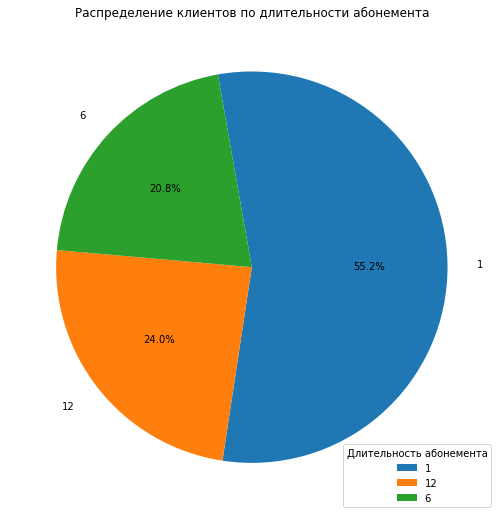

In [16]:
print(gym['contract_period'].value_counts())
#группируем датафрейм по длительности контракта с подсчётом количества
period_groups = (gym.pivot_table(index = 'contract_period', values = 'gender', aggfunc = 'count')
              .sort_values('gender', ascending = False))
#построение круговой диаграммы с подписями % доли
period_groups.plot(
    kind = 'pie', y = 'gender', figsize = (9,9)
    , startangle=100, autopct='%1.1f%%', counterclock = False,labeldistance = 1.15)
plt.legend(title = 'Длительность абонемента', loc =4)
plt.title('Распределение клиентов по длительности абонемента')
plt.ylabel('');
plt.show()

Пропуски в данных отсутствуют. 

55.2% клиентов приобретают только месячные абонементы. Ни один клиент не приобрел абонемент на 3 месяца. Годовые абонементы приобретали только 24% клиентов.

4. **avg_additional_charges_total** - суммарная выручка от других услуг фитнес-центра.

Изучим характеристики выборки по данному показателю.

In [17]:
# создаём функцию для формирования краткой оценки показателя
def first_glance(frame, col, name):
    print('Характеристики выборки по показателю', col)
    print()
    print(frame[col].describe())
    print()
    print('Доля нулевых значений {:.2%}'.format((frame[frame[col] == 0][col].count())/len(frame[col])))
    print('Для 95% наблюдений показатель ниже', round(frame[col].quantile(0.95)))
    print()
    plt.figure(figsize = (8,8))
    sns.distplot(frame[col])
    plt.title('Распределение по показателю '+ name)
    plt.xlabel(name)
    plt.ylabel('Доля значений');
    plt.show()

Характеристики выборки по показателю avg_additional_charges_total

count    4000.000000
mean      146.943728
std        96.355602
min         0.148205
25%        68.868830
50%       136.220159
75%       210.949625
max       552.590740
Name: avg_additional_charges_total, dtype: float64

Доля нулевых значений 0.00%
Для 95% наблюдений показатель ниже 323



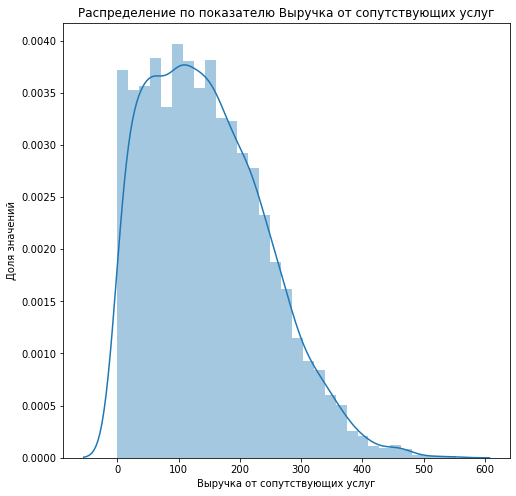

In [18]:
first_glance(gym, 'avg_additional_charges_total', 'Выручка от сопутствующих услуг')

95% клиентов не выходят за величину 323 ед. по дополнительным расходам. Средний уровень расходов 147 ед., медианный уровень расходов - 136 ед.

Проблемных значений в столбце не выявлено.

 5. **age** - возраст клиентов

Характеристики выборки по показателю age

count    4000.000000
mean       29.184250
std         3.258367
min        18.000000
25%        27.000000
50%        29.000000
75%        31.000000
max        41.000000
Name: age, dtype: float64

Доля нулевых значений 0.00%
Для 95% наблюдений показатель ниже 34



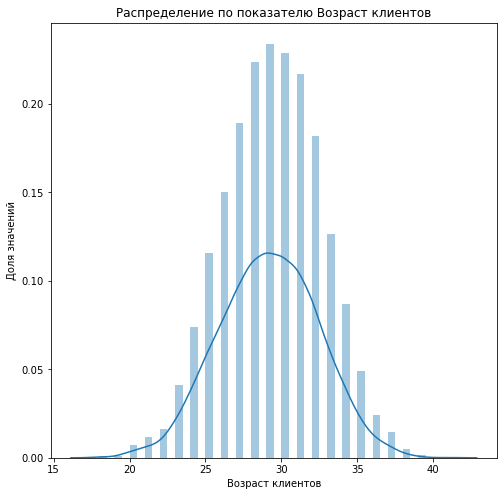

In [19]:
first_glance(gym, 'age', 'Возраст клиентов')

Минимальный возраст, с которого люди начинают заниматься в фитнес-центрах - 18 лет, дети в выборке отсутствуют. Максимальный возраст - 41. 
Большая часть сосредоточена в промежутке с 25 до 33 лет. Средний возвраст практически совпадает с медианным - 29 лет.

Проблемные значения и выбросы отсутствуют.

6. **month_to_end_contract** - срок до окончания текущего абонемента в месяцах

Характеристики выборки по показателю month_to_end_contract

count    4000.000000
mean        4.322750
std         4.191297
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: month_to_end_contract, dtype: float64

Доля нулевых значений 0.00%
Для 95% наблюдений показатель ниже 12



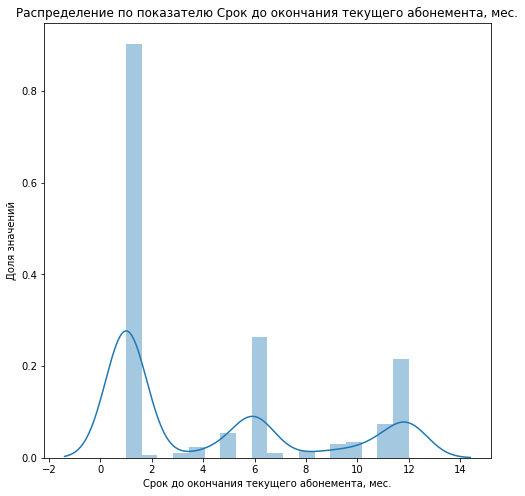

In [20]:
first_glance(gym, 'month_to_end_contract', 'Срок до окончания текущего абонемента, мес.')

Поскольку больше половины клиентов покупают только месячный абонемент, то логично, что  для них срок до окончания составляет 1 месяц. 
Данный показатель сильно коррелирует с длительностью абонемента, поэтому стоит рассмотреть возможность исключения показателя из набора характеристик при построении моделей.

Проблемных значений в столбце не обнаружено.

7. **lifetime** - время с момента первого обращения в фитнес-центр (в месяцах)

Характеристики выборки по показателю lifetime

count    4000.000000
mean        3.724750
std         3.749267
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        31.000000
Name: lifetime, dtype: float64

Доля нулевых значений 12.17%
Для 95% наблюдений показатель ниже 11



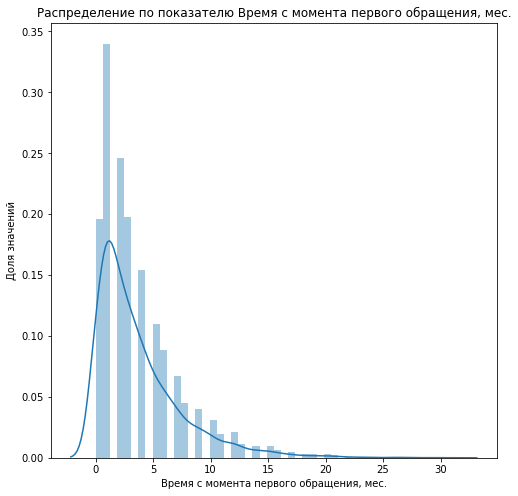

In [21]:
first_glance(gym, 'lifetime', 'Время с момента первого обращения, мес.')

Для большей части клиентов с первого обращения прошло менее года. 12.1% являются новыми клиентами. Среднее значение - 3.7 месяцев.

Проблемных значений не обнаружено, однако в выборке присутствует несколько значений, резко отклоняющихся от среднего.

8. **avg_class_frequency_total** - средняя частота посещений в неделю за все время с начала действия абонемента

Характеристики выборки по показателю avg_class_frequency_total

count    4000.000000
mean        1.879020
std         0.972245
min         0.000000
25%         1.180875
50%         1.832768
75%         2.536078
max         6.023668
Name: avg_class_frequency_total, dtype: float64

Доля нулевых значений 2.20%
Для 95% наблюдений показатель ниже 4



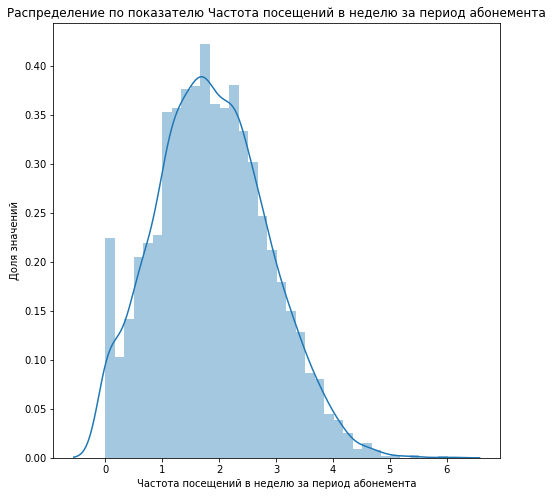

In [22]:
first_glance(gym, 'avg_class_frequency_total', 'Частота посещений в неделю за период абонемента')

2.2% клиентов ни разу не посещали фитнес-центр после покупки абонемента. Среднее количество посещений 1.9. 

Выбросов в выборке не обнаружено.

9. **avg_class_frequency_current_month** - средняя частота посещений в неделю за предыдущий месяц

Характеристики выборки по показателю avg_class_frequency_current_month

count    4000.000000
mean        1.767052
std         1.052906
min         0.000000
25%         0.963003
50%         1.719574
75%         2.510336
max         6.146783
Name: avg_class_frequency_current_month, dtype: float64

Доля нулевых значений 4.52%
Для 95% наблюдений показатель ниже 4



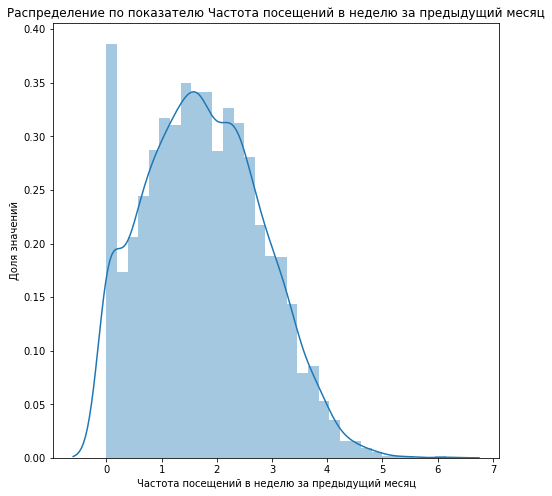

In [23]:
first_glance(gym, 'avg_class_frequency_current_month', 'Частота посещений в неделю за предыдущий месяц')

В предыдущем месяце у 4.52% клиентов отсутствуют посещения. Среднее кол-во посещений ниже, чем при рассмотрении посещений за весь период - 1.76.

Проблемных значений в столбце не обнаружено.

### Вывод <a id =info2></a>

Мы рассмотрели датафрейм с информацией о посещениях фитнес-центров. Таблица содержит **4000** записей в **14** столбцах.

Пропуски и проблемные значения в датафрейме отсутствуют. 

Первичный анализ структуры клиентской базы позволил составить следующий портрет среднего клиента.

- примерно с одинаковой вероятностью клиент может быть мужчиной или женщиной
- проживает/работает недалеко от фитнес-центра
- присоединился не по приглашению
- примерно в половине случаев использует скидочную программу компании-партнёра
- внёс в базу номер телефона
- посещает индивидуальные занятия
- приобретает абонемент на месяц
- в среднем приобретает дополнительных услуг на 147 ед.
- не старше 34 лет
- еженедельно посещает около 1.9 занятий

Мы можем заметить, что для показателей, представленных в датафрейме характерны существенные различия как по собственным величинам, так и по величинам стандартных отклонений. Поскольку в дальнейшем предполагается построение моделей для предсказания вероятности оттока, то целесообразно будет провести стандартизацию признаков.

### 2. Исследовательский анализ <a id =info3></a>

Рассмотрим выборку в разрезе клиентов, ушедших с обслуживания и продолжающих заниматься в фитнес-центрах.
Создадим функции для сравнения показателей для бинарных и числовых показателей.

In [24]:
#создаём датафрейм-таблицу соответствия названия колонки и описания показателя
check_list1 = pd.DataFrame({'col_name': ['age','avg_additional_charges_total', 'month_to_end_contract'\
                                         , 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'],
                           'description': ['Возраст клиента', 'Объем доп. услуг, ед.',' Срок до окончания абонемента, мес.',
                                          'Время с момента первого обращения, мес.', 'Среднее кол-во посещений в неделю всего',
                                          'Среднее кол-во посещений в неделю в последнем месяце']})
check_list1

col_name  \
0                                age   
1       avg_additional_charges_total   
2              month_to_end_contract   
3                           lifetime   
4          avg_class_frequency_total   
5  avg_class_frequency_current_month   

                                         description  
0                                    Возраст клиента  
1                              Объем доп. услуг, ед.  
2                 Срок до окончания абонемента, мес.  
3            Время с момента первого обращения, мес.  
4            Среднее кол-во посещений в неделю всего  
5  Среднее кол-во посещений в неделю в последнем ...

In [25]:
#функция для сравнения показателя по текущим клиентам и клиентам, ушедшим в отток
# 2 аргумента  - колонка датафрейма и описание содержащихся в ней значений
def churn_compare1(col_name, description):
    print('Характеристики текущих клиентов по показателю', description)
    print()
    print(gym[gym['churn']==0][col_name].describe())
    print()
    print('Характеристики ушедших клиентов по показателю', description)
    print()
    print(gym[gym['churn']==1][col_name].describe())
    print()
    plt.figure(figsize = (8,8))
    #строим дистплоты для значений с оттоком 0 и оттоком 1
    sns.distplot(gym[gym['churn']==0][col_name], label = 'Действующий клиент')
    sns.distplot(gym[gym['churn']==1][col_name], label = 'Отток')
    plt.title('Распределение по показателю '+ description)
    plt.xlabel(description)
    plt.ylabel('Доля значений')
    plt.legend(title = 'Факт оттока');
    plt.show()

Характеристики текущих клиентов по показателю Возраст клиента

count    2939.000000
mean       29.976523
std         3.009933
min        19.000000
25%        28.000000
50%        30.000000
75%        32.000000
max        41.000000
Name: age, dtype: float64

Характеристики ушедших клиентов по показателю Возраст клиента

count    1061.000000
mean       26.989632
std         2.895163
min        18.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        38.000000
Name: age, dtype: float64



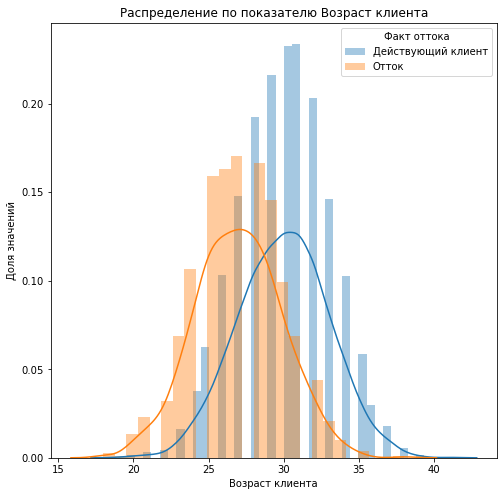

Характеристики текущих клиентов по показателю Объем доп. услуг, ед.

count    2939.000000
mean      158.445715
std        99.801599
min         0.171862
25%        76.920993
50%       149.881171
75%       224.448274
max       552.590740
Name: avg_additional_charges_total, dtype: float64

Характеристики ушедших клиентов по показателю Объем доп. услуг, ед.

count    1061.000000
mean      115.082899
std        77.696419
min         0.148205
25%        50.629127
50%       103.814686
75%       165.616858
max       425.535220
Name: avg_additional_charges_total, dtype: float64



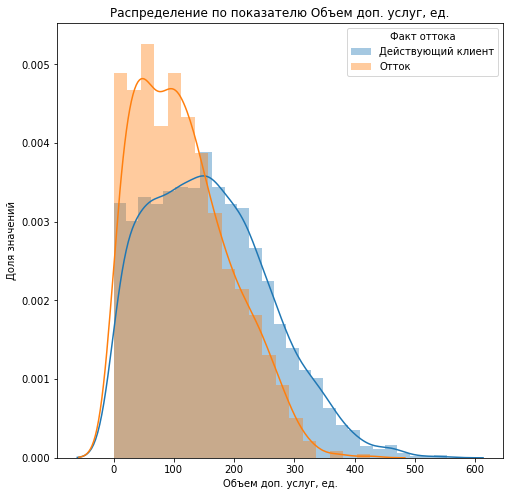

Характеристики текущих клиентов по показателю  Срок до окончания абонемента, мес.

count    2939.000000
mean        5.283089
std         4.363522
min         1.000000
25%         1.000000
50%         6.000000
75%        10.000000
max        12.000000
Name: month_to_end_contract, dtype: float64

Характеристики ушедших клиентов по показателю  Срок до окончания абонемента, мес.

count    1061.000000
mean        1.662582
std         1.964593
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        12.000000
Name: month_to_end_contract, dtype: float64



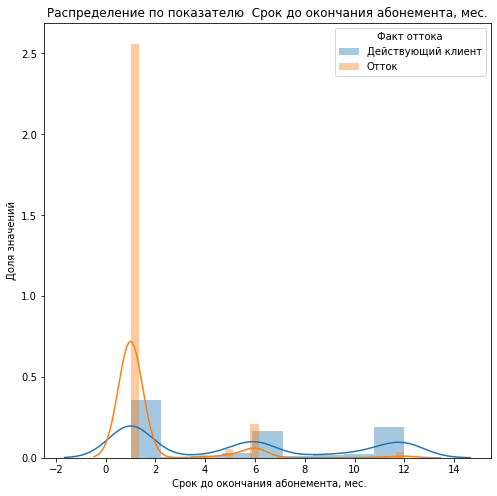

Характеристики текущих клиентов по показателю Время с момента первого обращения, мес.

count    2939.000000
mean        4.711807
std         3.874780
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        31.000000
Name: lifetime, dtype: float64

Характеристики ушедших клиентов по показателю Время с момента первого обращения, мес.

count    1061.000000
mean        0.990575
std         1.110799
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         9.000000
Name: lifetime, dtype: float64



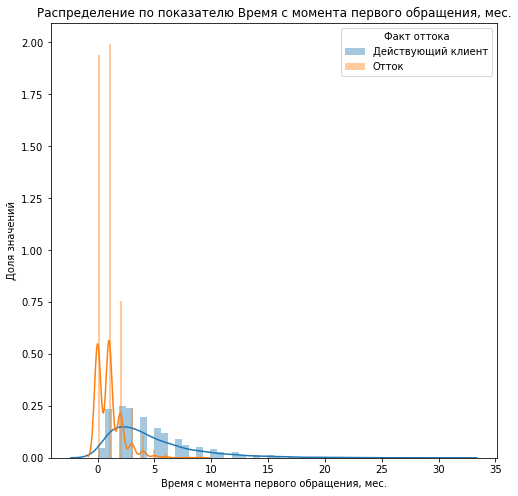

Характеристики текущих клиентов по показателю Среднее кол-во посещений в неделю всего

count    2939.000000
mean        2.024876
std         1.016006
min         0.000000
25%         1.283137
50%         2.043252
75%         2.732944
max         6.023668
Name: avg_class_frequency_total, dtype: float64

Характеристики ушедших клиентов по показателю Среднее кол-во посещений в неделю всего

count    1061.000000
mean        1.474995
std         0.694705
min         0.000000
25%         1.010771
50%         1.491187
75%         1.956438
max         3.478646
Name: avg_class_frequency_total, dtype: float64



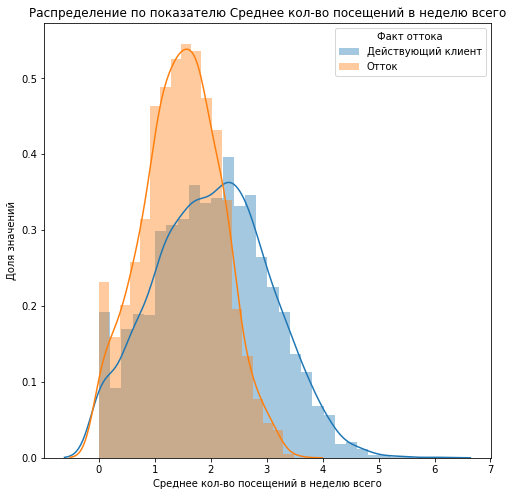

Характеристики текущих клиентов по показателю Среднее кол-во посещений в неделю в последнем месяце

count    2939.000000
mean        2.027882
std         1.018994
min         0.000000
25%         1.297021
50%         2.046697
75%         2.740648
max         6.146783
Name: avg_class_frequency_current_month, dtype: float64

Характеристики ушедших клиентов по показателю Среднее кол-во посещений в неделю в последнем месяце

count    1061.000000
mean        1.044546
std         0.770237
min         0.000000
25%         0.421337
50%         0.979445
75%         1.588576
max         3.540271
Name: avg_class_frequency_current_month, dtype: float64



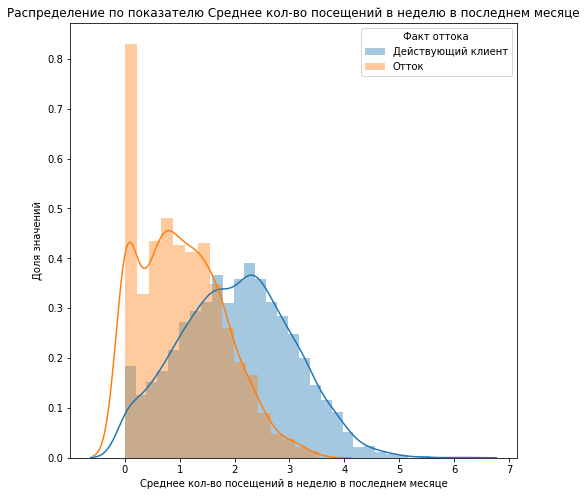

In [26]:
# запускаем функцию, используя в качестве аргументов ряды нового датафрейма
for index, row in check_list1.iterrows():
    churn_compare1(row['col_name'], row['description'])

Мы можем выявить следующие основные характеристики числовых показателей для текущих клиентов и клиентов, ушедших в отток:

Текущие клиенты:

- средний возраст - 30 лет
- средний объем дополнительных услуг - 158.4 ед.
- средний срок до окончания абонемента - 5.2 мес.
- среднее время с момента первого обращения 4.7 мес.
- среднее кол-во посещений в неделю всего - 2
- среднее кол-во посещений в неделю за последний месяц - 2

Ушедшие клиенты:

- средний возраст - 27 лет
- средний объем дополнительных услуг - 115.08 ед.
- средний срок до окончания абонемента - 1.6 мес.
- среднее время с момента первого обращения 1 мес.
- среднее кол-во посещений в неделю всего - 1.47
- среднее кол-во посещений в неделю за последний месяц - 1.04

Мы видим, что в среднем в отток уходят более молодые клиенты, до 28 лет. Смещение между группами составляет 3 года.
Сохранившиеся клиенты тратят на 43.32 ед. больше.
Клиенты, ушедшие в отток, покупали абонемент на меньший срок и более чем в 75% случаев являются новыми клиентами, пришедшими в прошлом месяце. Так же клиенты из группы оттока в среднем реже посещают занятия (1.47 раз в неделю против 2).

Мы можем предположить, что в отток уходят новые клиенты, которые попробовали позаниматься в течение месяца, но затем решили не продолжать посещение фитнес-центров.

Рассмотрим бинарные и категориальные показатели:

In [27]:
# создаём фрейм с бинарными показателями
check_list2 = pd.DataFrame({'col_name':['gender' ,'near_location', 'promo_friends', 'partner', 'phone', 'group_visits'],
                           'description': ['Пол', 'Близкое расположение', 'Рекомендация друзей', 'Партнёрская программа'
                                           , 'Наличие телефона в базе', 'Посещение групповых занятий']})

In [28]:
#создаём функцию для анализа бинарных показателей
def churn_compare2(col_name, description):
    column_name = col_name
    print('Распределение долей текущих клиентов по показателю', description)
    print()
    #находим доли разных значений
    print(gym[gym['churn']==0][col_name].value_counts()/len(gym[gym['churn']==0][col_name]))
    print()
    print('Распределение долей ушедших клиентов по показателю', description)
    print()
    print(gym[gym['churn']==1][col_name].value_counts()/len(gym[gym['churn']==1][col_name]))
    print()
    #создаём группировку по показателям отток и название колонки
    group_churn = gym.groupby(['churn', col_name]).agg({'age': 'count'})
    group_churn = group_churn.rename(columns = {'age': 'quantity'})
    #делим группировку на суммы по первому из индексов
    group_churn = group_churn / group_churn.groupby(level=0).sum()
    group_churn= group_churn.reset_index()
    width = 0.5       # устанавливаем ширину столбцов
    
    labels = ['Текущие', 'Ушедшие']
    point_0 = group_churn[group_churn[col_name] == 0]['quantity']
    point_1 = group_churn[group_churn[col_name] == 1]['quantity']
    
    fig, ax = plt.subplots()
    #задаём 2 столбчатые диаграммы, указываем, что второй слой находится выше первого
    ax.bar(labels, point_0, width, label='0')
    ax.bar(labels, point_1, width, bottom=point_0, label='1')

    ax.set_ylabel('Доля клиентов')
    ax.set_title('Сравнение по группам клиентов по показателю ' + description)
    ax.legend()

    plt.show()

Распределение долей текущих клиентов по показателю Пол

1    0.510037
0    0.489963
Name: gender, dtype: float64

Распределение долей ушедших клиентов по показателю Пол

1    0.510839
0    0.489161
Name: gender, dtype: float64



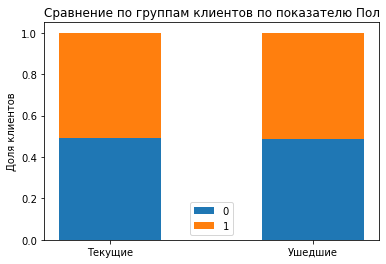

Распределение долей текущих клиентов по показателю Близкое расположение

1    0.873086
0    0.126914
Name: near_location, dtype: float64

Распределение долей ушедших клиентов по показателю Близкое расположение

1    0.768143
0    0.231857
Name: near_location, dtype: float64



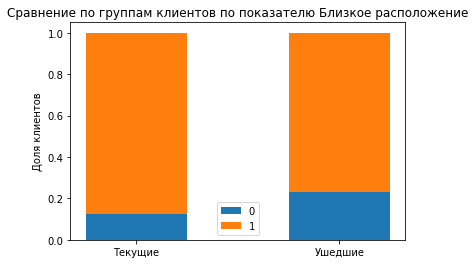

Распределение долей текущих клиентов по показателю Рекомендация друзей

0    0.646478
1    0.353522
Name: promo_friends, dtype: float64

Распределение долей ушедших клиентов по показателю Рекомендация друзей

0    0.816211
1    0.183789
Name: promo_friends, dtype: float64



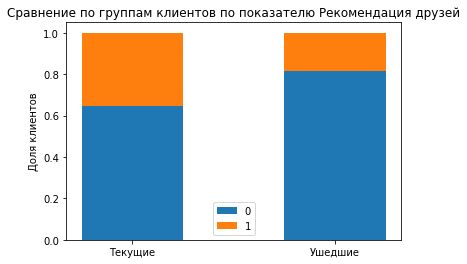

Распределение долей текущих клиентов по показателю Партнёрская программа

1    0.534195
0    0.465805
Name: partner, dtype: float64

Распределение долей ушедших клиентов по показателю Партнёрская программа

0    0.644675
1    0.355325
Name: partner, dtype: float64



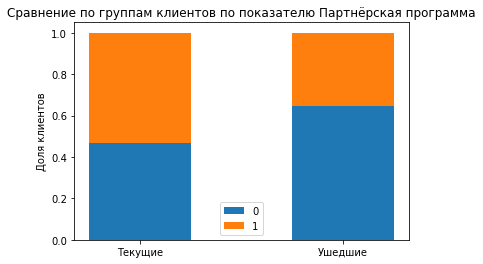

Распределение долей текущих клиентов по показателю Наличие телефона в базе

1    0.903709
0    0.096291
Name: phone, dtype: float64

Распределение долей ушедших клиентов по показателю Наличие телефона в базе

1    0.902922
0    0.097078
Name: phone, dtype: float64



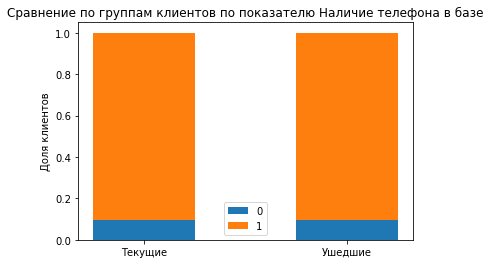

Распределение долей текущих клиентов по показателю Посещение групповых занятий

0    0.535897
1    0.464103
Name: group_visits, dtype: float64

Распределение долей ушедших клиентов по показателю Посещение групповых занятий

0    0.731385
1    0.268615
Name: group_visits, dtype: float64



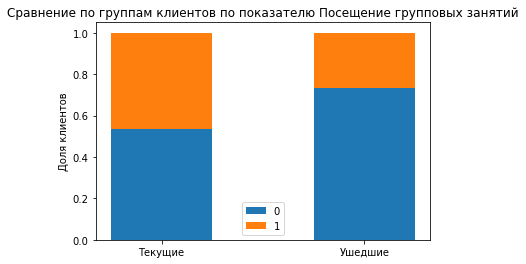

In [29]:
#проводим проверку по списку из нового вспомогательного датафрейма
for index, row in check_list2.iterrows():
    churn_compare2(row['col_name'], row['description'])

 Изучения бинарных показателей показало следующее:

- половой состав двух групп практически не отличается 
- ушедшие клиенты в среднем с меньшей вероятностью проживают близко к фитнес-центрам
- ушедшие клиенты в 81% случаев приходили без рекомендации друзей (против 64% у оставшихся)
- ушедшие клиенты с вероятностью 64% пришли **не** по партнёрской программе (46% для лояльных клиентов)
- наличие телефона в базе примерно одинаковое для двух групп
- 73% из ушедших клиентов посещали индивидуальные занятия (53% для лояльных)

Рассмотрим последний из показателей - длительность абонемента.

In [30]:
print(gym[gym['churn']==0]['contract_period'].value_counts()/len(gym[gym['churn']==0]['contract_period']))

1     0.433141
12    0.318816
6     0.248044
Name: contract_period, dtype: float64


In [31]:
print('Распределение долей текущих клиентов по показателю Длительность абонемента')
print()
print(gym[gym['churn']==0]['contract_period'].value_counts()/len(gym[gym['churn']==0]['contract_period']))
print()
print('Распределение долей ушедших клиентов по показателю Длительность абонемента')
print()
print(gym[gym['churn']==1]['contract_period'].value_counts()/len(gym[gym['churn']==1]['contract_period']))
print()
#формируем сводную таблицу для построения диаграммы
gym_pivot = gym.pivot_table(index = ['churn', 'contract_period'],  values = 'age', aggfunc = 'count')
gym_pivot = gym_pivot.reset_index()
gym_pivot = gym_pivot.rename(columns = {'age': 'quantity'})

#строим столбчатую диаграмму с разбитием каждого столбца по факту оттока
fig = px.bar(gym_pivot, color = 'churn', y = 'quantity', x = 'contract_period', barmode = 'stack'
            , labels = {'churn': 'Факт оттока',
                        'quantity':'Кол-во клиентов',
                        'contract_period':'Длительность абонемента'}
             , title = 'Распределение по длительности абонемента', text = 'quantity',
             color_continuous_scale=["orange", "blue"])
fig.update_traces(textposition = 'inside')
fig.show()

Распределение долей текущих клиентов по показателю Длительность абонемента

1     0.433141
12    0.318816
6     0.248044
Name: contract_period, dtype: float64

Распределение долей ушедших клиентов по показателю Длительность абонемента

1     0.880302
6     0.098021
12    0.021678
Name: contract_period, dtype: float64



По данному графику мы видим следующую закономерность: длительность абонемента сильно влияет на факт оттока. Среди тех, кто приобрёл абонементы на полгода и год доля оттока мала. При этом клиенты, приобредшие абонемент на месяц, уходят в 42% случаев.

Для того, чтобы построить модель для прогнозирования вероятности ухода клиентов, рассмотрим матрицу корреляции между показателями.

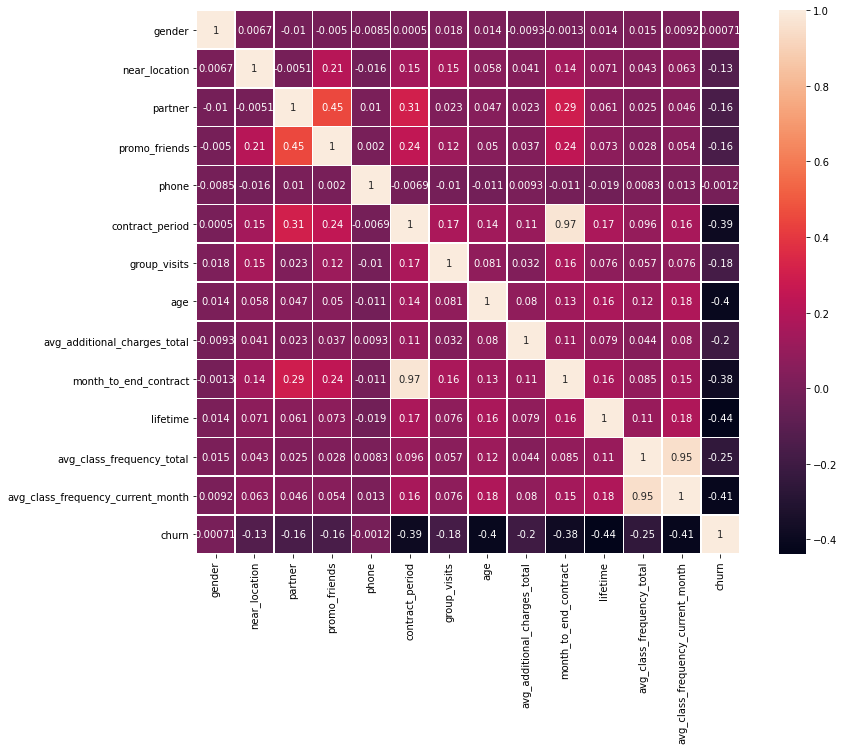

In [32]:
plt.figure(figsize = (14,10))
sns.heatmap(data = gym.corr(), square = True, annot = True, linecolor = 'white', linewidths = 0.4);

Мы обнаружили высокую корреляцию между следующими парами показателей:
- month_to_end_contract и contract_period - 0.97
- avg_class_frequency_current_month и avg_class_frequency_total - 0.95

При формировании набора признаков для модели считаем возможным исключить по одному признаку из пары, т.к. их взаимная корреляция может негативно повлиять на качество модели.

### Вывод <a id =info4></a>

В ходе исследовательского анализа было выявлено следующее:

В отток уходит примерно **42%** клиентов, приобретающих абонемент на 1 месяц. При этом, клиенты из этой группы чаще всего являются новыми - с их первого посещения проходит не более месяца.

Они реже посещают занятия (1.6 раз в неделю против 2 у лояльных), с большей вероятностью ходят на индивидуальные занятия и приходят в центры самостоятельно (не по коду дружбы или партнёрской программе).

Это, в среднем, более молодые клиенты (средний возраст на 3 года ниже, чем у лояльных).

Таким образом, мы можем предположить, что у фитнес-центров есть проблема с удержанием новых клиентов (они посещают некоторое количество занятий, но теряют заинтересованность и не покупают новый абонемент).

Изучение матрицы корреляции показало, что взаимно связаны 2 пары показателей:

- длительность абонемента и количество месяцев до конца контракта
- частота посещения всего и частота посещения в предыдущий месяц

В дальнейшем при построении моделей необходимо исключить один из показателей в паре.

### 3. Прогнозирование оттока клиентов <a id =info5></a>

#### 3.1.  Построение моделей <a id =info6></a>

Переходим к построению моделей. Мы будем использовать 2 модели для бинарной классификации. Целевая переменная - 'churn' - факт оттока. Используемые модели: Логистическая регрессия и Случайный лес.

Для начала уберём 2 столбца из пары признаков, показавших высокую взаимную корреляцию:

In [33]:
gym_cleared = gym.drop(columns = ['month_to_end_contract', 'avg_class_frequency_current_month'])
#задаём целевую переменную и матрицу признаков
y = gym_cleared['churn']
X = gym_cleared.drop(columns = ['churn'])

Разобьём множества на тестовую и валидационную выборки в соотношении 80% на 20%.

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Стандартизуем признаки.

In [35]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

1. Исследуем первую модель - Логистическая регрессия

In [36]:
model = LogisticRegression(random_state=0)
model.fit(X_train_st, y_train)
prediction = model.predict(X_test_st)
print('Модель LogisticRegression')
print()
print('Оценка accuracy: {:.4}'.format(accuracy_score(y_test, prediction)))
print('Оценка precision: {:.4}'.format(precision_score(y_test, prediction)))
print('Оценка recall: {:.4}'.format(recall_score(y_test, prediction)))
coef = model.coef_.flatten()
#print(coef)
#формируем фрейм, где соотносим коэффициенты признаков и их наименования
Reg_imp = pd.DataFrame(data = {'feature': X.columns, 'coef': coef})
display(Reg_imp.sort_values('coef', ascending = False))

Модель LogisticRegression

Оценка accuracy: 0.8988
Оценка precision: 0.7882
Оценка recall: 0.8081


feature      coef
0                         gender  0.049457
2                        partner -0.053055
1                  near_location -0.088120
4                          phone -0.120001
3                  promo_friends -0.217953
6                   group_visits -0.359770
8   avg_additional_charges_total -0.567072
10     avg_class_frequency_total -0.730469
7                            age -1.093218
5                contract_period -1.316552
9                       lifetime -3.879688

Модель логистической регрессии показала долю правильных ответов - 89.9%, точность - 78.9%, полнота 80.8%.

Наиболее важными признаками оказались: число месяцев с первого посещения, тип абонемента по длительности и возраст клиента.

2. Рассмотрим вторую модель - Случайный лес

In [37]:
model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train_st, y_train)
prediction = model2.predict(X_test_st)
print('Модель RandomForestClassifier')
print()
print('Оценка accuracy: {:.4}'.format(accuracy_score(y_test, prediction)))
print('Оценка precision: {:.4}'.format(precision_score(y_test, prediction)))
print('Оценка recall: {:.4}'.format(recall_score(y_test, prediction)))
importance = model2.feature_importances_.flatten()
#print(coef)
#формируем фрейм, где соотносим коэффициенты признаков и их наименования
Forest_imp = pd.DataFrame(data = {'feature': X.columns, 'importance': importance})
display(Forest_imp.sort_values('importance', ascending = False))

Модель RandomForestClassifier

Оценка accuracy: 0.89
Оценка precision: 0.7865
Оценка recall: 0.7626


feature  importance
9                       lifetime    0.336627
10     avg_class_frequency_total    0.167682
7                            age    0.145872
8   avg_additional_charges_total    0.137607
5                contract_period    0.113528
6                   group_visits    0.022918
3                  promo_friends    0.017572
2                        partner    0.017395
0                         gender    0.017353
1                  near_location    0.013489
4                          phone    0.009955

Модель случайного леса показала долю правильных ответов - 89%, точность - 78.6%, полнота 76.3%.

Наиболее важными признаками оказались: число месяцев с первого посещения, частота посещений в неделю и возраст клиента.

В целом модель **логистической регрессии** показала немного лучшие результаты по трём основным метрикам. Поэтому полагаем возможным использовать её для прогнозов.

#### 3.2. Кластеризация клиентов <a id =info7></a>

Попробуем разделить клиентов фитнес-центров на группы. Для начала, сформируем дендрограмму. В качестве 

In [38]:
#стандартизуем матрицу признаков
sc = StandardScaler()
X_sc = sc.fit_transform(X)

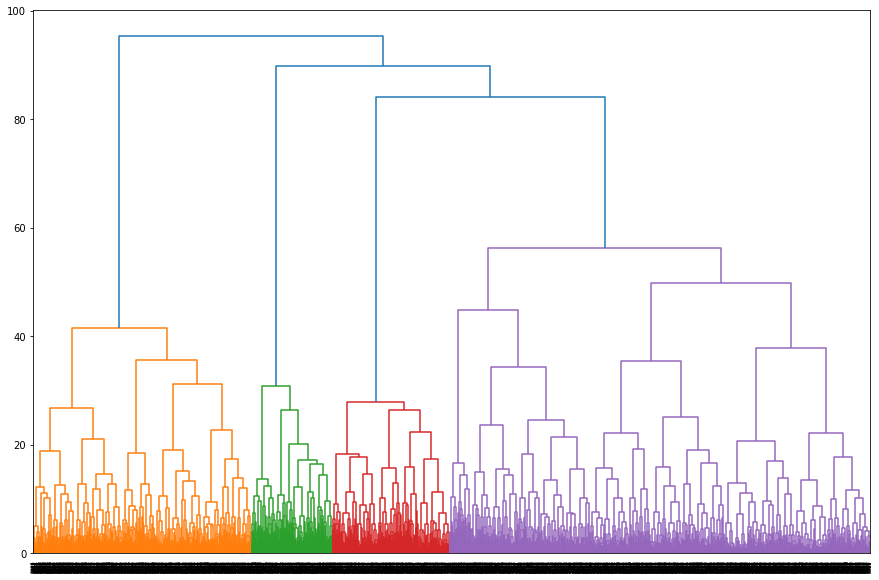

In [39]:


linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Алгоритм предполагает, что среди клиентов можно выделить 4 кластера, однако мы видим, что в 4 кластере также различимы 2 крупные группы. При дальнейшей кластеризации иными алгоритмами предлагаем делить клиентов на 4-5 кластеров.

Воспользуемся алгоритмом K-means с числом кластеров -5.

In [40]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)
#добавляем кластер в исходную таблицу
gym['cluster'] = labels
gym.head()

gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   churn  cluster  
0      0        4  
1      0        2  
2      0        3  
3      0        1  
4      0        1

In [41]:
print(gym['cluster'].value_counts())

3    1072
1    1066
2     917
0     559
4     386
Name: cluster, dtype: int64


Мы разделили клиентов на 5 кластеров. Наиболее крупными получились кластеры **3** и **1** по 1072 и 1066 записей соответственно. Самый маленький кластер - **4** (386 клиентов).

Теперь создаём функцию для сравнения по кластерам разных показателей. Начнем с числовых.

In [42]:
#функция для сравнения показателя по кластерам
def cluster_compare1(col_name, description):
    for i in range (0,5):
        print('Характеристики клиентов кластера {} по показателю'.format(i), description)
        print(gym[gym['cluster']==i][col_name].describe())
        print()
    plt.figure(figsize = (15,10))
#строим боксплот для каждого из кластеров
    ax = sns.boxplot(x="cluster", y = col_name, data=gym)
    plt.title('Распределение по показателю '+ description)
    plt.xlabel('Кластеры')
    plt.ylabel(description);
    #plt.legend(title = 'Кластер');
    plt.show()

Характеристики клиентов кластера 0 по показателю Возраст клиента
count    559.000000
mean      28.708408
std        3.224423
min       18.000000
25%       27.000000
50%       29.000000
75%       31.000000
max       39.000000
Name: age, dtype: float64

Характеристики клиентов кластера 1 по показателю Возраст клиента
count    1066.000000
mean       29.474672
std         3.080732
min        20.000000
25%        27.000000
50%        30.000000
75%        32.000000
max        38.000000
Name: age, dtype: float64

Характеристики клиентов кластера 2 по показателю Возраст клиента
count    917.000000
mean      30.958561
std        2.880522
min       22.000000
25%       29.000000
50%       31.000000
75%       33.000000
max       41.000000
Name: age, dtype: float64

Характеристики клиентов кластера 3 по показателю Возраст клиента
count    1072.000000
mean       27.584888
std         2.938885
min        18.000000
25%        26.000000
50%        28.000000
75%        30.000000
max        35.000000
Nam

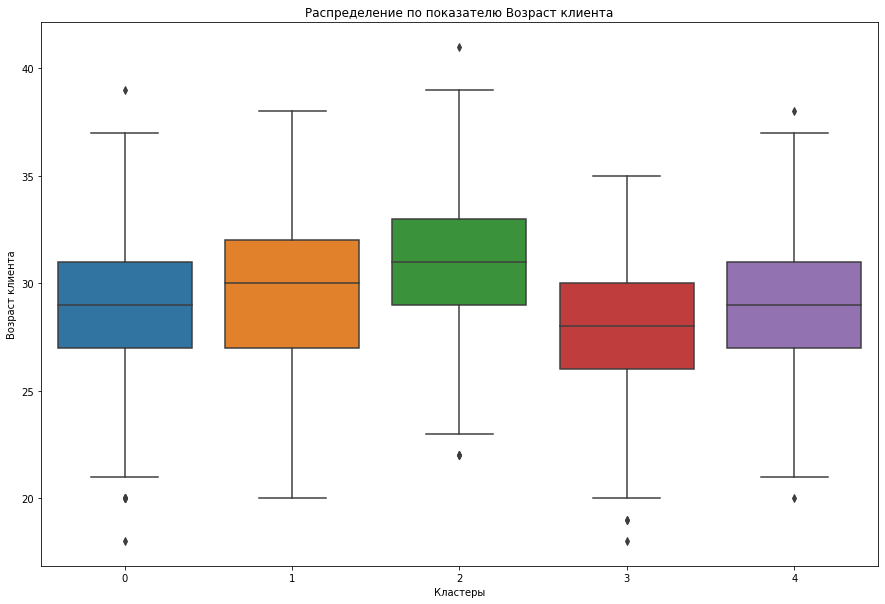

Характеристики клиентов кластера 0 по показателю Объем доп. услуг, ед.
count    559.000000
mean     137.385192
std       96.006913
min        0.972250
25%       59.311529
50%      124.323490
75%      196.875252
max      552.590740
Name: avg_additional_charges_total, dtype: float64

Характеристики клиентов кластера 1 по показателю Объем доп. услуг, ед.
count    1066.000000
mean      149.409166
std        96.028685
min         0.148205
25%        70.701038
50%       143.327739
75%       217.627938
max       460.904008
Name: avg_additional_charges_total, dtype: float64

Характеристики клиентов кластера 2 по показателю Объем доп. услуг, ед.
count    917.000000
mean     186.697490
std      101.221774
min        0.510545
25%      111.774686
50%      180.131372
75%      252.856455
max      488.708175
Name: avg_additional_charges_total, dtype: float64

Характеристики клиентов кластера 3 по показателю Объем доп. услуг, ед.
count    1072.000000
mean      116.455656
std        80.044203
min      

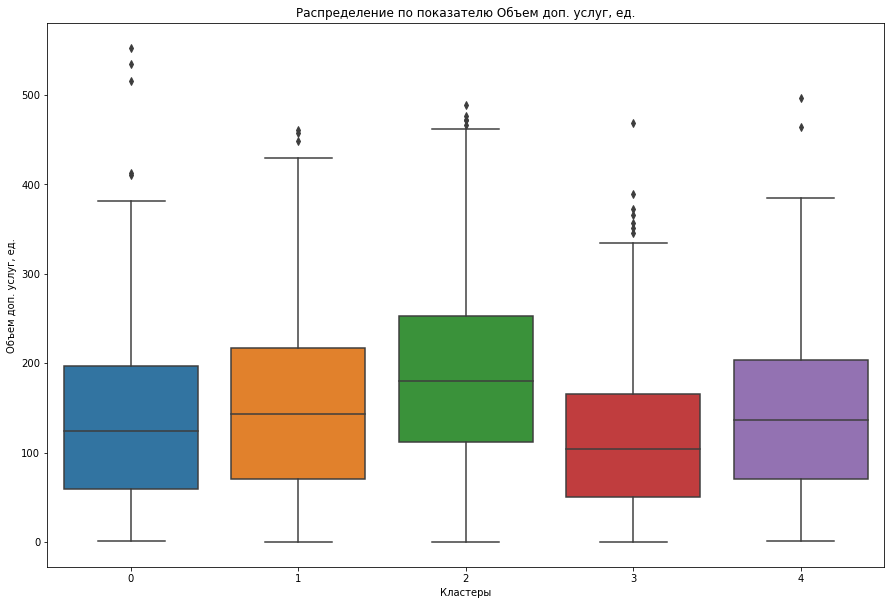

Характеристики клиентов кластера 0 по показателю  Срок до окончания абонемента, мес.
count    559.000000
mean       2.826476
std        3.253388
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       12.000000
Name: month_to_end_contract, dtype: float64

Характеристики клиентов кластера 1 по показателю  Срок до окончания абонемента, мес.
count    1066.000000
mean        6.969043
std         4.358789
min         1.000000
25%         1.000000
50%         6.000000
75%        12.000000
max        12.000000
Name: month_to_end_contract, dtype: float64

Характеристики клиентов кластера 2 по показателю  Срок до окончания абонемента, мес.
count    917.000000
mean       4.813522
std        4.231447
min        1.000000
25%        1.000000
50%        4.000000
75%        8.000000
max       12.000000
Name: month_to_end_contract, dtype: float64

Характеристики клиентов кластера 3 по показателю  Срок до окончания абонемента, мес.
count    1072.000000
mean        2.00

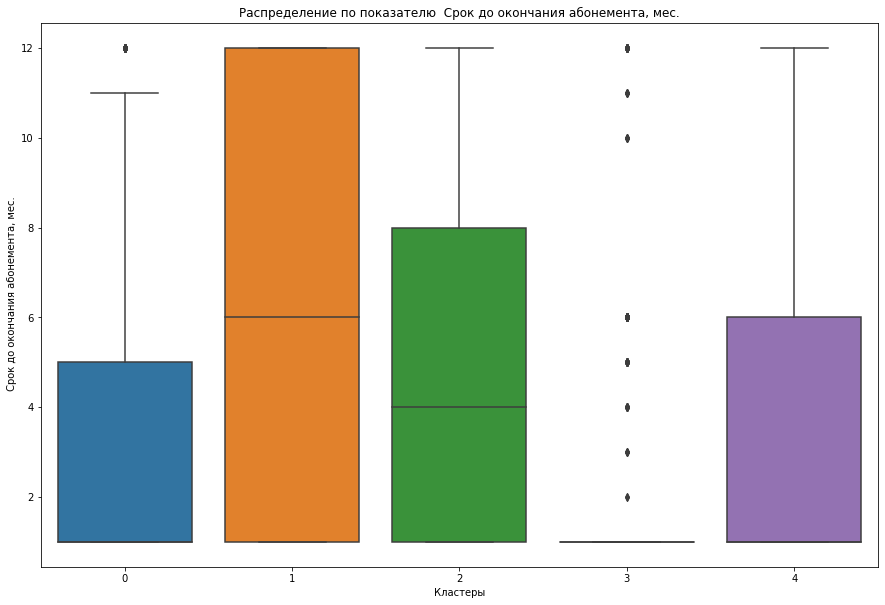

Характеристики клиентов кластера 0 по показателю Время с момента первого обращения, мес.
count    559.000000
mean       3.007156
std        3.211196
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       24.000000
Name: lifetime, dtype: float64

Характеристики клиентов кластера 1 по показателю Время с момента первого обращения, мес.
count    1066.000000
mean        4.057223
std         3.467828
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        21.000000
Name: lifetime, dtype: float64

Характеристики клиентов кластера 2 по показателю Время с момента первого обращения, мес.
count    917.000000
mean       5.778626
std        4.566355
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       31.000000
Name: lifetime, dtype: float64

Характеристики клиентов кластера 3 по показателю Время с момента первого обращения, мес.
count    1072.000000
mean        1.933769
std         2.0494

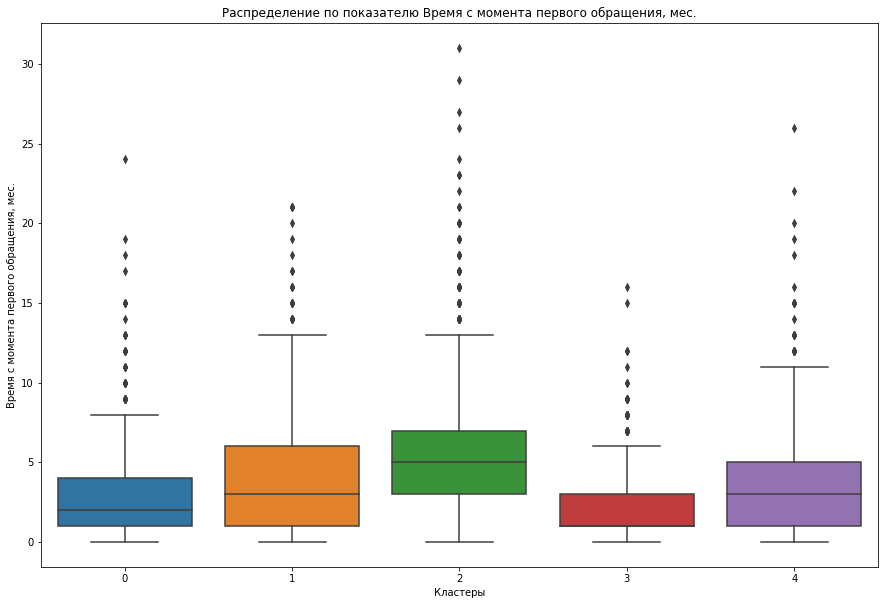

Характеристики клиентов кластера 0 по показателю Среднее кол-во посещений в неделю всего
count    559.000000
mean       1.768159
std        0.935880
min        0.000000
25%        1.109221
50%        1.670240
75%        2.354070
max        4.698029
Name: avg_class_frequency_total, dtype: float64

Характеристики клиентов кластера 1 по показателю Среднее кол-во посещений в неделю всего
count    1066.000000
mean        1.912481
std         0.997616
min         0.000000
25%         1.169551
50%         1.872727
75%         2.596019
max         6.023668
Name: avg_class_frequency_total, dtype: float64

Характеристики клиентов кластера 2 по показателю Среднее кол-во посещений в неделю всего
count    917.000000
mean       2.400164
std        0.940776
min        0.000000
25%        1.750356
50%        2.468044
75%        3.031378
max        5.421898
Name: avg_class_frequency_total, dtype: float64

Характеристики клиентов кластера 3 по показателю Среднее кол-во посещений в неделю всего
count    

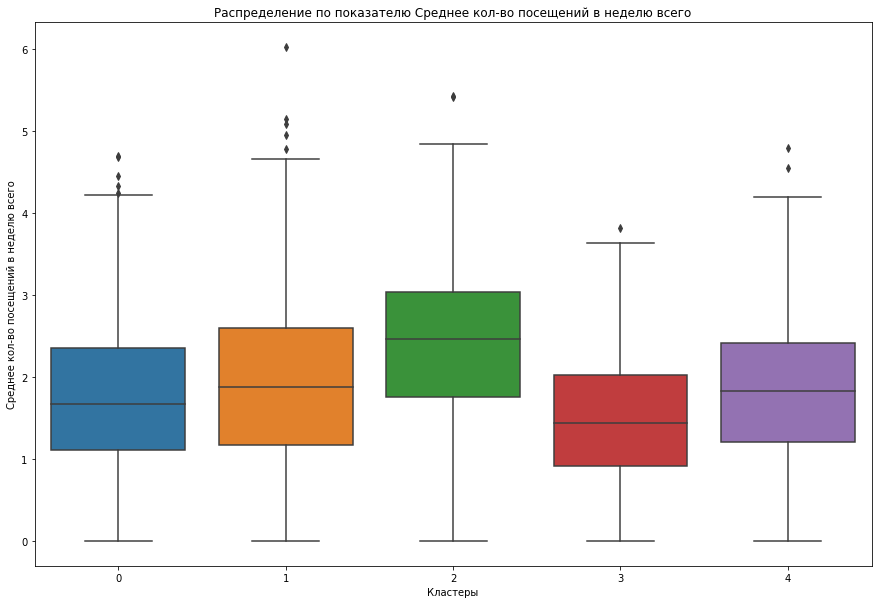

Характеристики клиентов кластера 0 по показателю Среднее кол-во посещений в неделю в последнем месяце
count    559.000000
mean       1.603568
std        1.035925
min        0.000000
25%        0.822727
50%        1.507663
75%        2.289840
max        5.024721
Name: avg_class_frequency_current_month, dtype: float64

Характеристики клиентов кластера 1 по показателю Среднее кол-во посещений в неделю в последнем месяце
count    1066.000000
mean        1.866603
std         1.032752
min         0.000000
25%         1.080513
50%         1.837646
75%         2.582914
max         6.146783
Name: avg_class_frequency_current_month, dtype: float64

Характеристики клиентов кластера 2 по показателю Среднее кол-во посещений в неделю в последнем месяце
count    917.000000
mean       2.389931
std        0.950962
min        0.000000
25%        1.718300
50%        2.438550
75%        3.023096
max        5.458295
Name: avg_class_frequency_current_month, dtype: float64

Характеристики клиентов кластера 3 

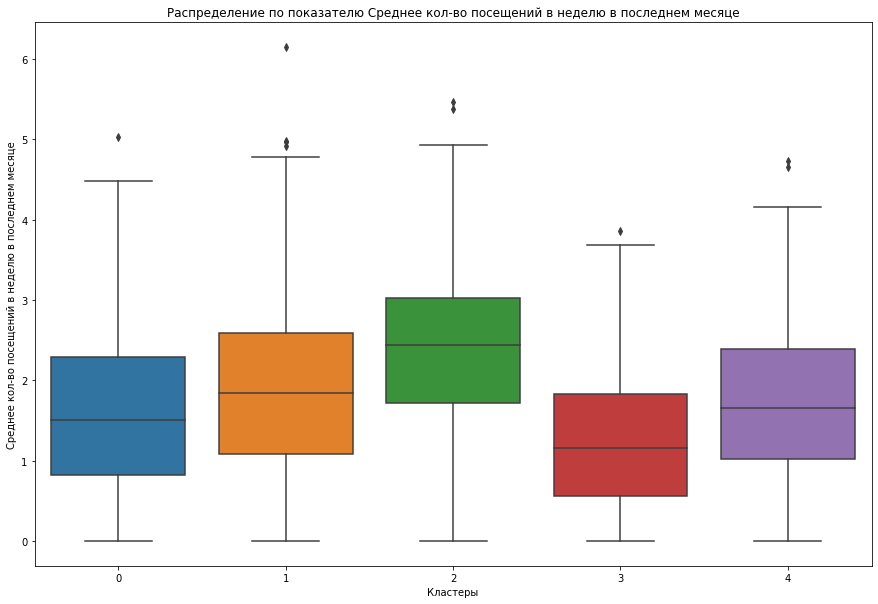

In [43]:
for index, row in check_list1.iterrows():
    cluster_compare1(row['col_name'], row['description'])

Можно выделить следующие характеристики кластеров:

1) 0

- размер кластера - 559
- средний возраст клиента - 28.7
- объём доп. услуг, ед. - 137.4
- срок до окончания абонемента, мес. - 2.8
- время с момента первого обращения, мес. - 3
- среднее кол-во посещений в неделю - 1.8
- среднее кол-во посещений в неделю в последнем месяце - 1.6

2) 1

- размер кластера - 1066
- средний возраст клиента - 29.5
- объём доп. услуг, ед. - 149.4
- срок до окончания абонемента, мес. - 7
- время с момента первого обращения, мес. - 4
- среднее кол-во посещений в неделю - 1.9
- среднее кол-во посещений в неделю в последнем месяце - 1.9

3) 2

- размер кластера 917
- средний возраст клиента - 31
- объём доп. услуг, ед. - 186.7
- срок до окончания абонемента, мес. - 4.8
- время с момента первого обращения, мес. - 5.6
- среднее кол-во посещений в неделю - 2.4
- среднее кол-во посещений в неделю в последнем месяце - 2.4

4) 3

- размер кластера - 1072
- средний возраст клиента - 27.6
- объём доп. услуг, ед. - 116.4
- срок до окончания абонемента, мес. - 2
- время с момента первого обращения, мес. - 1.9
- среднее кол-во посещений в неделю - 1.5
- среднее кол-во посещений в неделю в последнем месяце - 1.2

5) 4

- размер кластера - 386 
- средний возраст клиента - 29.3
- объём доп. услуг, ед. - 144.2
- срок до окончания абонемента, мес. - 4.7
- время с момента первого обращения, мес. - 3.9
- среднее кол-во посещений в неделю - 1.8
- среднее кол-во посещений в неделю в последнем месяце - 1.7

По графикам распределения наибольшее различие мы видим между кластерами 2 и 3. Особенно оно заметно в части возраста, объёма дополнительных услуг и количества посещений в последний месяц. Кластеры 0, 1 и 4 не демонстрируют между собой серьёзных различий по выбранным показателям.

В кластере 2 сосредоточились наиболее доходные и возрастные клиенты, в кластере 3 наоборот просматривается проседание по данным показателям по сравнению с остальными кластерами.

Перейдём к бинарным и категориальным показателям.

In [44]:
def cluster_compare2(col_name, description):
    column_name = col_name
    for i in range (0,5):
        print('Характеристики клиентов кластера {} по показателю'.format(i), description)
        print()
        print(gym[gym['cluster']==i][col_name].value_counts()/len(gym[gym['cluster']==i][col_name]))
    # находим сводную таблицу с долей каждого из значений по группам    
    gym_pivot = gym.groupby(['cluster', col_name]).agg({'age':'count'})
    gym_pivot = gym_pivot.rename(columns = {'age': 'quantity'})
    gym_pivot = gym_pivot/gym_pivot.groupby(level=0).sum() 
    gym_pivot = gym_pivot.reset_index()
    gym_pivot['quantity'] = round(gym_pivot['quantity'], 2)


    #строим столбчатую диаграмму с разбитием по значению показателя
    fig = px.bar(gym_pivot, color = col_name, y = 'quantity', x = 'cluster', barmode = 'stack'
            , labels = {'cluster': 'Кластер',
                        'quantity':'Доля клиентов',
                        col_name : description}
             , title = ('Распределение по показателю ' + description), text = 'quantity',
             color_continuous_scale=["orange", 'green', "blue"])
    fig.update_traces(textposition = 'inside')
    fig.show()

In [45]:
cluster_compare2('contract_period', 'Длительность абонемента')

Характеристики клиентов кластера 0 по показателю Длительность абонемента

1     0.713775
6     0.191413
12    0.094812
Name: contract_period, dtype: float64
Характеристики клиентов кластера 1 по показателю Длительность абонемента

12    0.497186
1     0.264540
6     0.238274
Name: contract_period, dtype: float64
Характеристики клиентов кластера 2 по показателю Длительность абонемента

1     0.477644
12    0.271538
6     0.250818
Name: contract_period, dtype: float64
Характеристики клиентов кластера 3 по показателю Длительность абонемента

1     0.822761
6     0.144590
12    0.032649
Name: contract_period, dtype: float64
Характеристики клиентов кластера 4 по показателю Длительность абонемента

1     0.533679
12    0.240933
6     0.225389
Name: contract_period, dtype: float64


In [46]:
for index, row in check_list2.iterrows():
    cluster_compare2(row['col_name'], row['description'])

Характеристики клиентов кластера 0 по показателю Пол

1    0.502683
0    0.497317
Name: gender, dtype: float64
Характеристики клиентов кластера 1 по показателю Пол

0    0.513133
1    0.486867
Name: gender, dtype: float64
Характеристики клиентов кластера 2 по показателю Пол

1    0.561614
0    0.438386
Name: gender, dtype: float64
Характеристики клиентов кластера 3 по показателю Пол

0    0.511194
1    0.488806
Name: gender, dtype: float64
Характеристики клиентов кластера 4 по показателю Пол

1    0.523316
0    0.476684
Name: gender, dtype: float64


Характеристики клиентов кластера 0 по показателю Близкое расположение

0    1.0
Name: near_location, dtype: float64
Характеристики клиентов кластера 1 по показателю Близкое расположение

1    0.996248
0    0.003752
Name: near_location, dtype: float64
Характеристики клиентов кластера 2 по показателю Близкое расположение

1    0.996728
0    0.003272
Name: near_location, dtype: float64
Характеристики клиентов кластера 3 по показателю Близкое расположение

1    1.0
Name: near_location, dtype: float64
Характеристики клиентов кластера 4 по показателю Близкое расположение

1    0.862694
0    0.137306
Name: near_location, dtype: float64


Характеристики клиентов кластера 0 по показателю Рекомендация друзей

0    0.921288
1    0.078712
Name: promo_friends, dtype: float64
Характеристики клиентов кластера 1 по показателю Рекомендация друзей

1    0.883677
0    0.116323
Name: promo_friends, dtype: float64
Характеристики клиентов кластера 2 по показателю Рекомендация друзей

0    0.949836
1    0.050164
Name: promo_friends, dtype: float64
Характеристики клиентов кластера 3 по показателю Рекомендация друзей

0    0.921642
1    0.078358
Name: promo_friends, dtype: float64
Характеристики клиентов кластера 4 по показателю Рекомендация друзей

0    0.694301
1    0.305699
Name: promo_friends, dtype: float64


Характеристики клиентов кластера 0 по показателю Партнёрская программа

0    0.509839
1    0.490161
Name: partner, dtype: float64
Характеристики клиентов кластера 1 по показателю Партнёрская программа

1    0.943715
0    0.056285
Name: partner, dtype: float64
Характеристики клиентов кластера 2 по показателю Партнёрская программа

0    0.732824
1    0.267176
Name: partner, dtype: float64
Характеристики клиентов кластера 3 по показателю Партнёрская программа

0    0.776119
1    0.223881
Name: partner, dtype: float64
Характеристики клиентов кластера 4 по показателю Партнёрская программа

0    0.528497
1    0.471503
Name: partner, dtype: float64


Характеристики клиентов кластера 0 по показателю Наличие телефона в базе

1    1.0
Name: phone, dtype: float64
Характеристики клиентов кластера 1 по показателю Наличие телефона в базе

1    1.0
Name: phone, dtype: float64
Характеристики клиентов кластера 2 по показателю Наличие телефона в базе

1    1.0
Name: phone, dtype: float64
Характеристики клиентов кластера 3 по показателю Наличие телефона в базе

1    1.0
Name: phone, dtype: float64
Характеристики клиентов кластера 4 по показателю Наличие телефона в базе

0    1.0
Name: phone, dtype: float64


Характеристики клиентов кластера 0 по показателю Посещение групповых занятий

0    0.767442
1    0.232558
Name: group_visits, dtype: float64
Характеристики клиентов кластера 1 по показателю Посещение групповых занятий

1    0.523452
0    0.476548
Name: group_visits, dtype: float64
Характеристики клиентов кластера 2 по показателю Посещение групповых занятий

1    0.533261
0    0.466739
Name: group_visits, dtype: float64
Характеристики клиентов кластера 3 по показателю Посещение групповых занятий

0    0.713619
1    0.286381
Name: group_visits, dtype: float64
Характеристики клиентов кластера 4 по показателю Посещение групповых занятий

0    0.572539
1    0.427461
Name: group_visits, dtype: float64


Мы получили следующие характеристики кластеров:

Наибольшая доля длительных абонементов (на 6 и 12 месяцев) - кластеры 1,2 и 4

Наименьшая доля длительных абонементов - кластеры 0 и 3

Распределение по полу примерно равное.

В кластере 0 содержатся только удалённые клиенты, в кластерах 1,2,3 - только проживающие/работающие близко

В кластеры 0,2 и 3 попали клиенты пришедшие практически без рекомендаций друзей. Кластер 1 - 88% по рекомендации.

Клиенты кластера 1 на 94% пришли по партнёрской программе. В остальных кластерах различие не столь существенное.

В кластере 4 собраны все клиенты без телефона в базе.

По групповым занятиям нет существенных различий между группами 1,2 и 4. Наибольшая доля одиночников сосредоточена в кластерах 0 (77%) и 3 (71%).

Теперь рассмотрим, как кластеры показывают себя по отношению к результирующему показателю - факт оттока.

In [47]:
cluster_compare2('churn', 'Факт оттока')

Характеристики клиентов кластера 0 по показателю Факт оттока

0    0.599284
1    0.400716
Name: churn, dtype: float64
Характеристики клиентов кластера 1 по показателю Факт оттока

0    0.882739
1    0.117261
Name: churn, dtype: float64
Характеристики клиентов кластера 2 по показателю Факт оттока

0    0.976009
1    0.023991
Name: churn, dtype: float64
Характеристики клиентов кластера 3 по показателю Факт оттока

1    0.547575
0    0.452425
Name: churn, dtype: float64
Характеристики клиентов кластера 4 по показателю Факт оттока

0    0.733161
1    0.266839
Name: churn, dtype: float64


Наиболее надёжным оказался кластер 2 (98% лояльных клиентов), на втором месте - кластер 1 (88% лояльных клиентов), на третьем - кластер 4.

Наименее лояльными являются клиенты из кластера 3 (только 45%).

### Вывод <a id =info8></a>

В ходе исследования мы провели построение моделей для предсказания оттока клиентов. Более эффективной показала себя модель **логистической регрессии**. Наиболее важными факторами для классификации являлись: 

- число месяцев с первого посещения
- тип абонемента по длительности
- возраст клиента
- частота посещения занятий

Также была проведена кластеризация клиентов с разбиением их на 5 групп. Наиболее лояльной показала себя группа с индексом **2** - это клиенты более старшего возраста, посещающие фитнес-центры уже в среднем 5.6 месяцев по 2.4 раза в неделю. Также для них характерны наиболее высокие дополнительные затраты по сравнению с другими группами.


На втором месте по лояльности - кластер с индексом **1**. Их, помимо других факторов, выделяет наличие партнёрской программы, рекомендаций друзей и наибольшая доля долгосрочных абонементов.

Наименее лояльным оказался кластер с индексом **3** (вероятность оттока 55%). Это наиболее молодая группа клиентов, посещающих еженедельно в среднем 1.6 занятий и в 82% случаев приобретающих абонемент сроком на 1 месяц.

### Общий вывод <a id =info9></a>

Мы провели исследование сети фитнес-центров в части выявления факторов, влияющих на отток клиентов. 

Наиболее лояльными показали себя клиенты, обладающие следующими характеристиками:

- средний возраст 29-30 лет
- дата первого посещения - 4-5 месяцев назад
- приобретён абонемент на полгода или год
- частота посещения занятий - более 2 раз в неделю

Наличие рекомендаций друзей и партнерских программ также положительно влияло на лояльность.

Тем не менее, слабым местом текущей стратегии развития сети фитнес-центров является удержание новых клиентов. Среди ушедших в отток клиентов 75% пришли за последний месяц и приобрели месячный абонемент. Это в среднем более молодые люди, до 28 лет. Количество еженедельных посещений среди них не достигает 2.

В связи с выявленными особенностями оттока клиентов предлагаем рассмотреть следующие возможные меры:

- Провести анкетирование новых клиентов на предмет выявления недостатков обслуживания/предлагаемых программ/ценовой политики. Т.к. наибольший отток наблюдается среди новых клиентов (похоже, что они перестают пользоваться услугами после пробного месяца), необходимо выявить факторы, которые негативно влияют на их желание продолжать заниматься
- Стимулирование продаж долгосрочных абонементов, так как наличие длительного контракта влияет на вероятность оттока
- Расширение партнёрских программ с близко расположенными организациями
- Возможный пересмотр расписания в пользу большего количества групповых занятий по сравнению с индивидуальными